In [14]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.ets import AutoETS

# Prediciones DIARIAS ETS

In [15]:
#cargame los pickle y_test_diario y Y_train_diario
y_test_diario = pd.read_pickle('y_test_diario.pkl')
y_train_diario = pd.read_pickle('y_train_diario.pkl')


In [16]:

ets_diario=AutoETS(auto=True, sp=7,seasonal=True, n_jobs=-1)
ets_diario.fit(y_train_diario)

#Predicciones
# Obtener el índice de tiempo de y_test_diario y usarlo como horizonte de predicción
fh = y_test_diario.index

# Realizar la predicción usando el índice de tiempo de y_test_diario
ets_pred_diario = ets_diario.predict(fh)




C:\Users\Pepe\AppData\Local\Temp\ipykernel_7860\3416496362.py:1: UserWarning: The user-specified parameters provided alongside auto=True in AutoETS may not be respected. The AutoETS function automatically selects the best model based on the information criterion, ignoring the error, trend, seasonal, and damped_trend parameters when auto=True is set. Please ensure that your intended behavior aligns with the automatic model selection.
  ets_diario=AutoETS(auto=True, sp=7,seasonal=True, n_jobs=-1)
C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\skbase\base\_base.py:139: UserWarning: The user-specified parameters provided alongside auto=True in AutoETS may not be respected. The AutoETS function automatically selects the best model based on the information criterion, ignoring the error, trend, seasonal, and damped_trend parameters when auto=True is set. Please ensure that your intended behavior aligns with the automatic model selection.
  self.__init__(**params)


In [17]:
#Obtenemos métricas
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import r2_score

# Suponiendo que ya tienes definidos y_test_diario y ets_pred_diario

# Calculando MAPE
mape_result = mean_absolute_percentage_error(y_test_diario, ets_pred_diario)

# Calculando MSE
mse_result = MeanSquaredError()(y_test_diario, ets_pred_diario)

# Calculando R2 score
r2_result = r2_score(y_test_diario, ets_pred_diario)

print("MAPE:", mape_result)
print


MAPE: 0.3944210143355262


<function print>

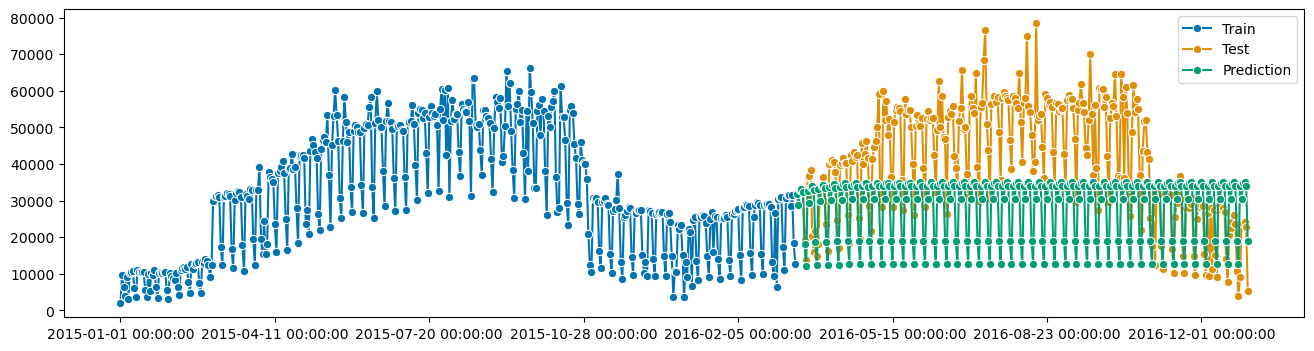

In [18]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

# Suponiendo que 'y_train_diario', 'y_test_diario', 'ets_pred_diciembre' son Series de pandas

# Graficar las series temporales
plot_series(y_train_diario["2015":], y_test_diario, ets_pred_diario, labels=["Train", "Test", "Prediction"])

# Mostrar el gráfico
plt.show()


In [19]:
# Define the forecast horizon for the month of January
fh_january_diario = pd.date_range(start='2017-01-01', end='2017-01-31', freq='D')

# Make predictions for the month of January
ets_pred_january_diario = ets_diario.predict(fh_january_diario)

# Print the predictions for the month of January
print(ets_pred_january_diario)


            Visitantes totales
2017-01-01        12613.450138
2017-01-02        34041.158500
2017-01-03        30511.440949
2017-01-04        34759.356820
2017-01-05        34962.001314
2017-01-06        33903.196593
2017-01-07        19102.241462
2017-01-08        12613.450138
2017-01-09        34041.158500
2017-01-10        30511.440949
2017-01-11        34759.356820
2017-01-12        34962.001314
2017-01-13        33903.196593
2017-01-14        19102.241462
2017-01-15        12613.450138
2017-01-16        34041.158500
2017-01-17        30511.440950
2017-01-18        34759.356820
2017-01-19        34962.001314
2017-01-20        33903.196593
2017-01-21        19102.241462
2017-01-22        12613.450138
2017-01-23        34041.158500
2017-01-24        30511.440950
2017-01-25        34759.356820
2017-01-26        34962.001314
2017-01-27        33903.196593
2017-01-28        19102.241462
2017-01-29        12613.450138
2017-01-30        34041.158500
2017-01-31        30511.440950


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

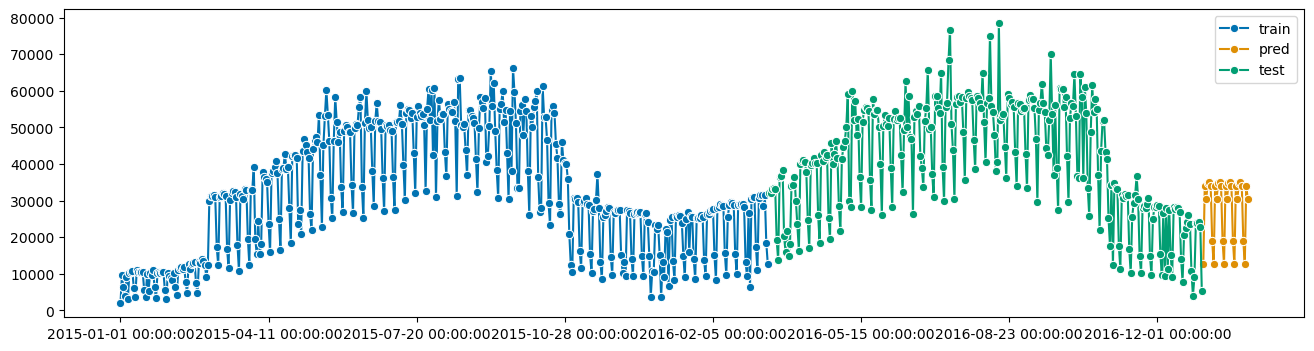

In [20]:
plot_series(y_train_diario["2015":], ets_pred_january_diario,y_test_diario, labels=["train", "pred", "test"])

# Predicciones Semanales ETS

In [21]:
#cargame los pickle y_test_semanal y Y_train_semanal
y_test_semanal = pd.read_pickle('y_test_semanal.pkl')
y_train_semanal = pd.read_pickle('y_train_semanal.pkl')
#juntares los dos dataframes
y_semanal = pd.concat([y_train_semanal, y_test_semanal])


In [22]:

ets_semanal=AutoETS(
    error='add',    
    trend=None,     
    seasonal='mul',
    sp=52,          
    n_jobs=-1       
)
ets_semanal.fit(y_train_semanal)

#Predicciones
fh=y_test_semanal.index

# Realizar la predicción usando el índice de tiempo de y_test_diario
ets_pred_semanal = ets_semanal.predict(fh)




C:\Users\Pepe\anaconda3\envs\seriestemporales\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [23]:
#Obtenemos métricas
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import r2_score

# Suponiendo que ya tienes definidos y_test_semanal y ets_pred_semanal

# Calculando MAPE
mape_result = mean_absolute_percentage_error(y_test_semanal, ets_pred_semanal)

# Calculando MSE
mse_result = MeanSquaredError()(y_test_semanal, ets_pred_semanal)

# Calculando R2 score
r2_result = r2_score(y_test_semanal, ets_pred_semanal)

print("MAPE:", mape_result)
print("MSE:", mse_result)
print("R2 score:", r2_result)


MAPE: 0.09466984318890426
MSE: 886280233.02375
R2 score: 0.8791750608392199


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

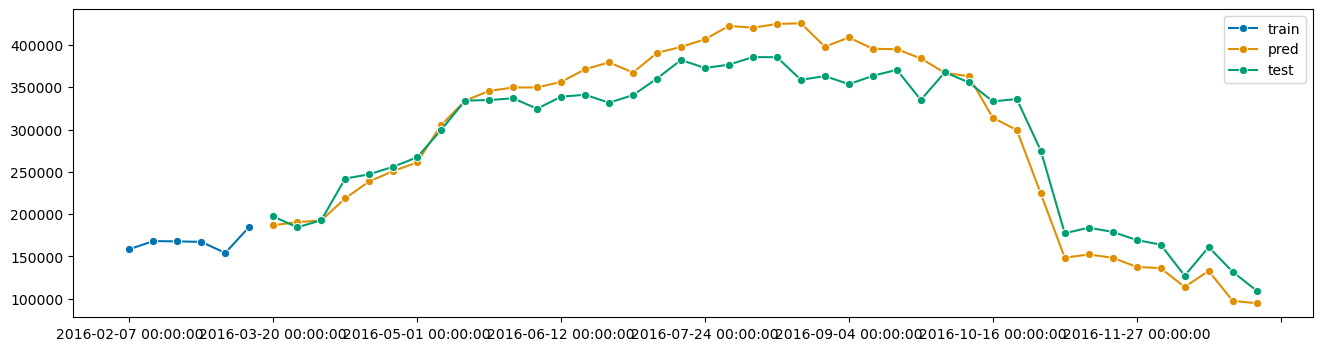

In [24]:
plot_series(y_train_semanal["2016-02-04":], ets_pred_semanal,y_test_semanal, labels=["train", "pred", "test"])

In [25]:
# Define the forecast horizon for the month of January
fh_january_semanal = pd.date_range(start='2017-01-01', end='2017-01-31', freq='W')

# Make predictions for the month of January
ets_pred_january_semanal = ets_semanal.predict(fh_january_semanal)

# Print the predictions for the month of January
print(ets_pred_january_semanal)

            Visitantes totales
2017-01-01        94399.832236
2017-01-08       106206.647902
2017-01-15       123479.671328
2017-01-22       115737.332049
2017-01-29       123156.745253


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

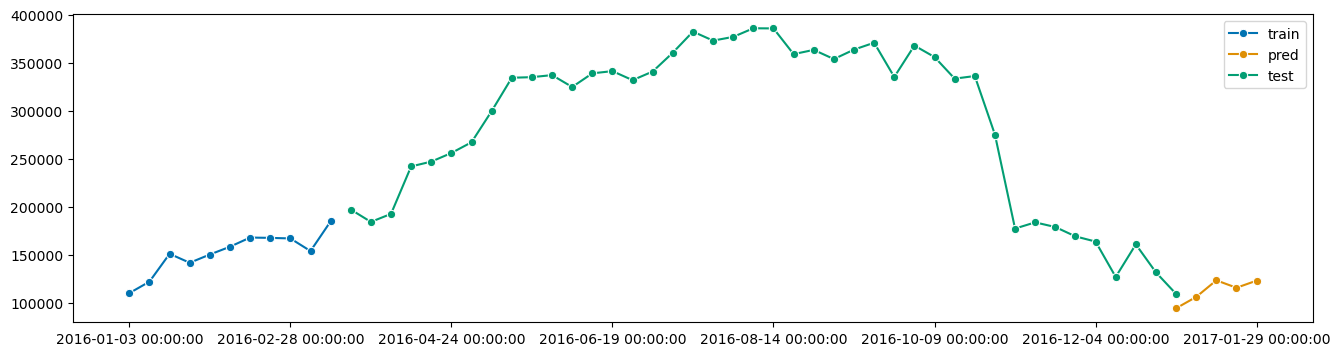

In [26]:
plot_series(y_train_semanal["2016":], ets_pred_january_semanal,y_test_semanal, labels=["train", "pred", "test"])

